 # Домашнее задание 1. Линейные модели

### Фамилия Имя Группа
Ставропольцев Артём ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th><font color="#008000">B</font></th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td><font color="#008000">M</font></td>
            <td>11</td>
            <td><font color="#008000">12</font></td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

In [2]:
BASELINE = 110000
pd.options.mode.chained_assignment = None
data = pd.read_csv('./data/Car details v3.csv')
print(data.info())
# Исходные данные имеют пустые значение, исключаем их, поскольку для обучения нужны все заполненные поля
data = data.dropna()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
def convert_to_float(x):
    res = ''.join(re.findall('[0-9.]+', x))
    return float(res)

def parse_torque(torque):
    if '/' in torque:
        return None
    torque_split = torque.split(' ')

    temp_split = torque_split[0].split('(')
    torque_nm = convert_to_float(temp_split[0])
    if torque_nm < 50:
        torque_nm *= 9.807

    if torque_split.__len__() == 2 or torque_split.__len__() == 3:
        reg_res = re.findall('[-~]', torque_split[1])
        if reg_res:
            temp_split = torque_split[1].split(reg_res[0])
            torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
        else:
            torque_rmp = convert_to_float(torque_split[1])
    elif torque_split.__len__() == 4:
        if 'at' in torque:
            pos = 2 if torque_split[1] == 'at' else 3
            reg_res = re.findall('[-~]', torque_split[pos])
            if reg_res:
                temp_split = torque_split[pos].split(reg_res[0])
                torque_rmp = (convert_to_float(temp_split[0]) + convert_to_float(temp_split[1])) / 2
            else:
                torque_rmp = convert_to_float(torque_split[pos])
        else:
            return None
    else:
        return None
    if torque_rmp > 5000:
        return None
        
    power = torque_nm * torque_rmp / 9.5488
    return power

# Переведем все подходящие колонки в численные значения
term = lambda x:float(''.join(re.findall('[0-9.]+', x)))
data['engine'] = data['engine'].apply(convert_to_float)
data['max_power'] = data['max_power'].apply(convert_to_float)
data['mileage'] = data['mileage'].apply(convert_to_float)
# Крутящий момент преобразуем в мощность (по формуле: крутящий момент [Nm] * обороты [rmp] / 9.5488) для точности данных
# Для этого распарсим столбец, получим крутящий момент и обороты, подставим их в формулу.
data['torque'] = data['torque'].apply(parse_torque)
data = data.dropna()

# Название машин не должно влиять на обучение
data = data.drop(columns='name', axis=1)

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7759 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7759 non-null   int64  
 1   selling_price  7759 non-null   int64  
 2   km_driven      7759 non-null   int64  
 3   fuel           7759 non-null   object 
 4   seller_type    7759 non-null   object 
 5   transmission   7759 non-null   object 
 6   owner          7759 non-null   object 
 7   mileage        7759 non-null   float64
 8   engine         7759 non-null   float64
 9   max_power      7759 non-null   float64
 10  torque         7759 non-null   float64
 11  seats          7759 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 788.0+ KB
None


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,39795.576408,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,52362.600536,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,35217.203209,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,51762.818365,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,53149.322428,5.0


## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

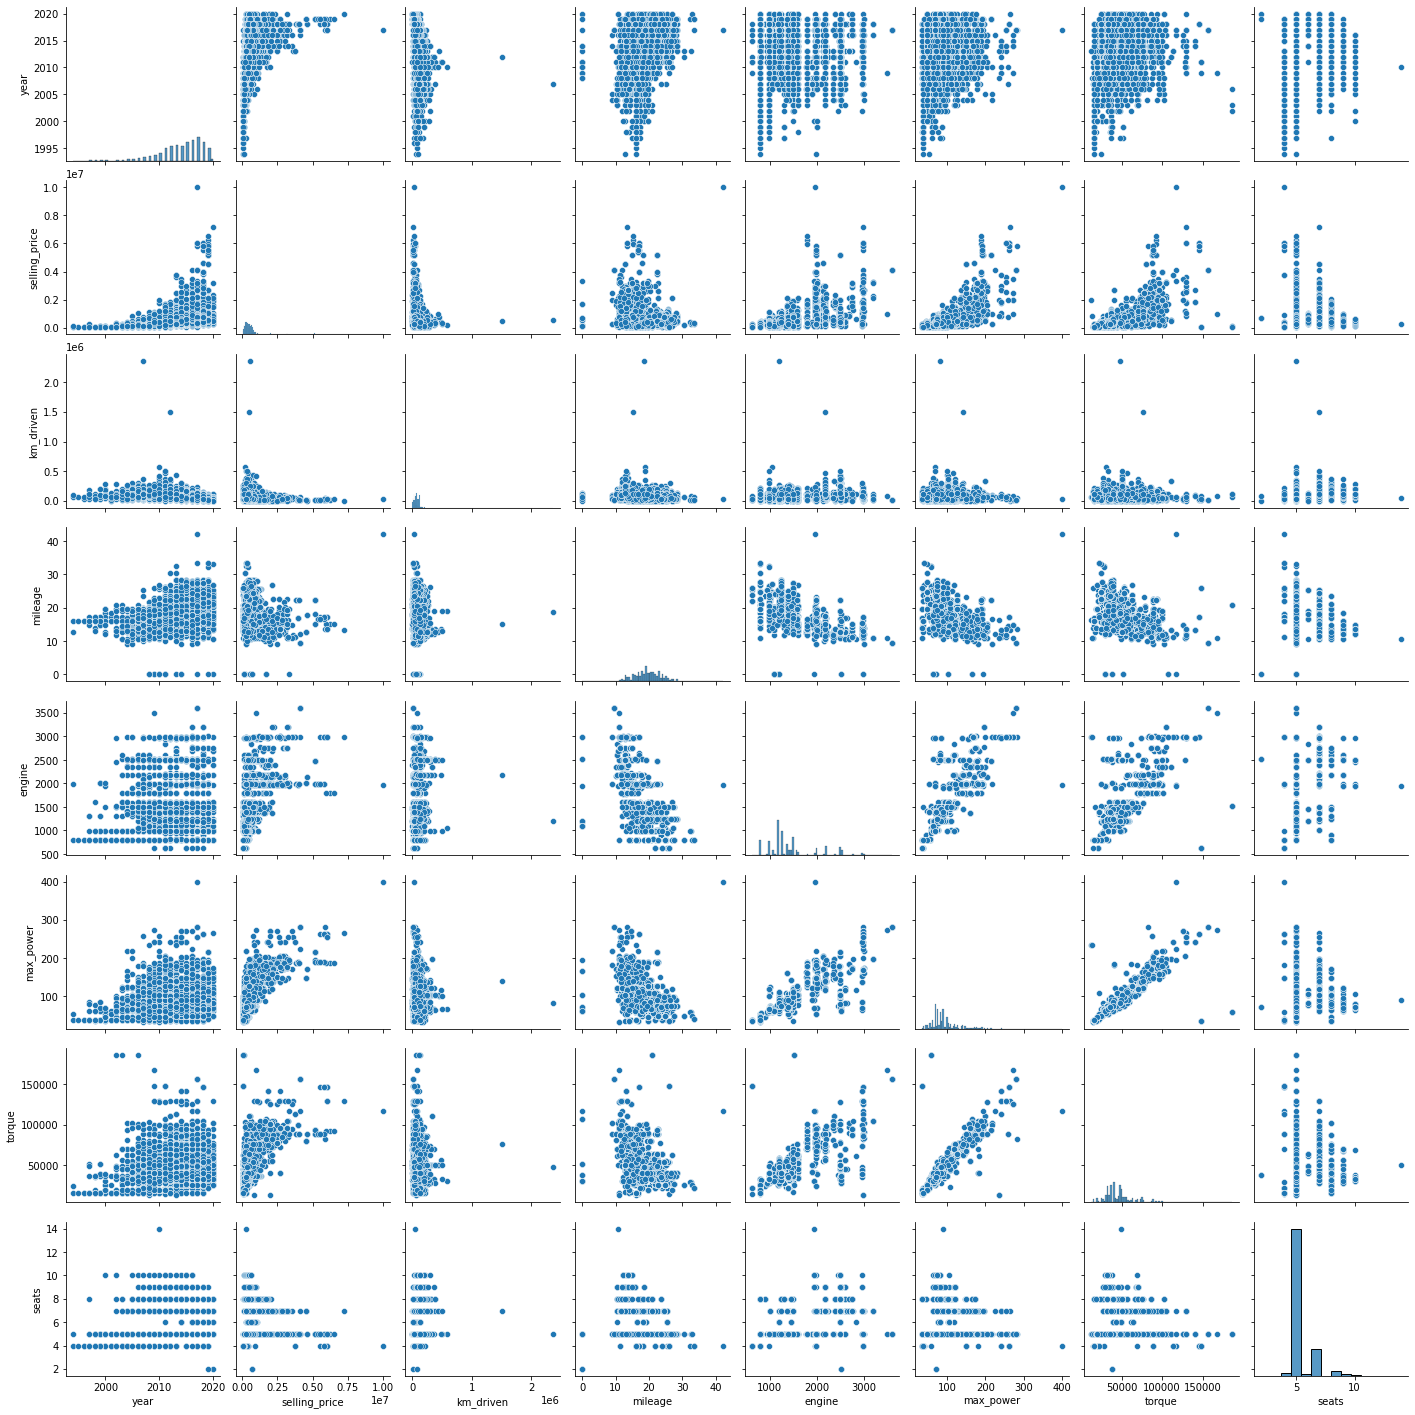

In [4]:
sns.pairplot(data)

## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [5]:
prices = data['selling_price']
features = pd.get_dummies(data.drop(columns='selling_price', axis=1)).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки.



In [6]:
regression = LinearRegression()
regression.fit(x_train, y_train)
print(f'Train score: {regression.score(x_train, y_train)}')
print(f'Test score: {regression.score(x_test, y_test)}')

rmse_OLS = mean_squared_error(y_test, regression.predict(x_test), squared=False)
print(f'RMSE OLS: {rmse_OLS}')
print(f'BASELINE: {BASELINE}')

Train score: 0.6884805854846033
Test score: 0.6771007318745784
RMSE OLS: 472776.1819126199
BASELINE: 110000


In [7]:
# Проведем филтрацию данных, исключив выбросы
quantile = np.quantile(data['selling_price'], 0.8)
print(f'Quantile: {quantile}')
clear_data = data[data['selling_price']<=quantile]
print(f'Row count is: {len(clear_data.axes[0])}')

Quantile: 750000.0
Row count is: 6289


In [8]:
prices = clear_data['selling_price']
features = pd.get_dummies(clear_data.drop(columns='selling_price', axis=1)).to_numpy()
x_train_clear, x_test_clear, y_train_clear, y_test_clear = train_test_split(features, prices, test_size=0.2, random_state=10)

In [9]:
regression_after_clear = LinearRegression()
regression_after_clear.fit(x_train_clear, y_train_clear)
print(f'Train score: {regression_after_clear.score(x_train_clear, y_train_clear)}')
print(f'Test score: {regression_after_clear.score(x_test_clear, y_test_clear)}')

rmse_OLS = mean_squared_error(y_test_clear, regression_after_clear.predict(x_test_clear), squared=False)
print(f'RMSE OLS: {rmse_OLS}')
print(f'BASELINE: {BASELINE}')

Train score: 0.6858427389330904
Test score: 0.6982656820250408
RMSE OLS: 104402.91120622975
BASELINE: 110000


## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [10]:
regression = Ridge()
regression.fit(x_train_clear, y_train_clear)
rmse_Ridge = mean_squared_error(y_test_clear, regression.predict(x_test_clear), squared=False)

print(f'RMSE Ridge: {rmse_Ridge}')
print(f'  BASELINE: {BASELINE}')

RMSE Ridge: 104403.36494804086
  BASELINE: 110000


## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [11]:
regression = Lasso()
regression.fit(x_train_clear, y_train_clear)
rmse_Lasso = mean_squared_error(y_test_clear, regression.predict(x_test_clear), squared=False)

print(f'RMSE Lasso: {rmse_Lasso}')
print(f'  BASELINE: {BASELINE}')

RMSE Lasso: 104402.79899780868
  BASELINE: 110000


## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

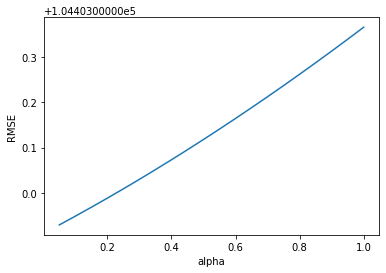

In [12]:
rmse_list = []
alphas = np.arange(0.05, 1.05, 0.05)

for alpha in alphas:
    regression = Ridge(alpha=alpha)
    regression.fit(x_train_clear, y_train_clear)
    rmse = mean_squared_error(y_test_clear, regression.predict(x_test_clear), squared=False)
    rmse_list.append(rmse)


plt.plot(alphas, rmse_list)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

In [13]:
print(f'  RMSE OLS: {rmse_OLS}')
print(f'RMSE Ridge: {rmse_Ridge}')
print(f'RMSE Lasso: {rmse_Lasso}')

  RMSE OLS: 104402.91120622975
RMSE Ridge: 104403.36494804086
RMSE Lasso: 104402.79899780868


Ваш ответ: модель Lasso показала наилучший результат

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

## 2.2 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

## 2.3 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

Ваш ответ: 

# 3. Самописная линейная регрессиия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [14]:
class SGDLinearRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass
    
    def predict(self, X):
        # Ваш код здесь
        pass


3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

Ваш вывод (2-3 предложения):

# 4. Самописная логистическая регрессиия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [15]:
class SGDLogisticRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon
        pass

    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))

    def fit(self, X, y, iterations=500):
        # Ваш код здесь
        pass


    def predict(self, X):
        # Ваш код здесь
        pass


4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

Ваш вывод (2-3 предложения):